In [1]:
import numpy as np
import pandas as pd
import os
from rendering_turing import renduFitness, renduModel
from rendering_kilotron import optimizeNeuralNetwork, fitnessPrecision, plot_variance_neuronnes
import pandas as pd


Début du test de l'extracteur des propriétés de l'essaim sur le chemin :  /home/mohamed/PycharmProjects/Projet_Kilobots
Début du test de l'extracteur des propriétés de l'essaim sur le chemin :  /home/mohamed/PycharmProjects/Projet_Kilobots


## Partie 01 : Modification des paramètres de l'équation diffusion par CMA-ES
### Auteurs : Milo et Mohamed
Dans cette partie nous présentons les résultats que nous avons obtenus durant l'étude d'une approche permettant l'optimisation des paramètres de réaction diffusion par un algorithme CMA-ES.
#### 1/Interface Simulateur et Mesures implémentées : 
Pour les besoins de la simulation nous avons développés et intégrer a notre code interface
qui nous permettait d'executer des simulations plusieurs fonctions permettant de calculer différentes mesures
caractérisant la structure de l'essaim.
Par exemple, une execution classique se fait comme suit : 

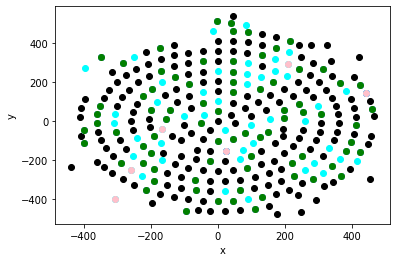

In [2]:
from Src.controllers.swarmDescriptor import swarmDescriptor
"""
Le paramètre précisé sert a distinguer 
le simulateur avec lequel on interragis
"""
SD = swarmDescriptor("morphogenesis")
SD.controller.rez_params()
SD.setTime(1500)
SD.controller.withVisiblite(False)
SD.setTopology("pile")
SD.setNb_robots(300)
SD.executeSimulation()
SD.genererRendu()

Ensuite le calcul de plusieurs mesures a été implémenté : 

{'id': 1, 'size': 293, 'shape_index': 1.6661061074117263, 'rectangliude': 0, 'elements': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 

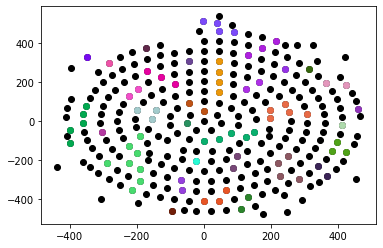

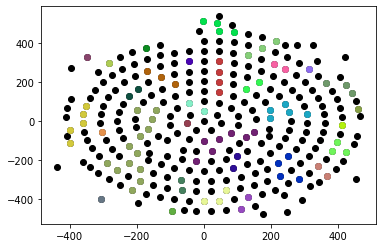

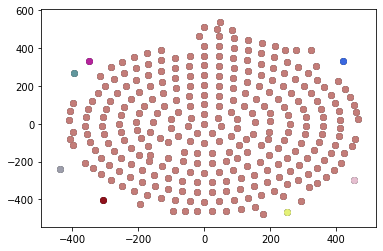

In [3]:
#Calcul des shapes index des différents clusters
SD.clusteriser()
SD.shapeIndex()
for c in SD.clusters:
    print(c)
#Ceci permet de calculer le nombre de Turing Spot
SD.calculerTuringSpots(4)
SD.renduTuringSpot(restedespoints=True)
SD.calculerTuringSpots(2)
SD.renduTuringSpot(restedespoints=True)
#Utiliser 0 par seuil peut s'avérer utile pour visualiser les clusters
SD.shapeIndex()
SD.rectanglitude()
SD.calculerTuringSpots(0)
SD.renduTuringSpot(True)

#### 2/Algorithme évolutionnaire : 
A présent que l'interface et les mesures ont étés implémentés, nous pouvons essayer différentes façons de modifier 
les paramètres de l'équation de réaction diffusion.
Pour ce faire il faut déterminer 4 choses : 
* Paramètrage du CMA-ES
* Paramètrage de la simulation
* Fonction Fitness
* Structure du génotype (les variables a modifier) 

Nous allons aborder les trois aspects et leur impact sur l'optimisation de l'essaim de ce qui suivra.

##### a)Fonction Fitness (naivement): 
D'abord, nous allons étudier l'impact de la variation de la fonction fitness sur l'éxécution du CMA-ES
Nous fixerons naivement les paramètres de la simulation et le génotype serra composé de tous les paramètres
de l'équation de réaction diffusion.
Nous executons chaque algorithme sur 200 itérations puis nous affichons un rendu.

D'abord nous commençons par expérimenter l'utilisation du nombre de Turing Spots

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=978625, Sun Mar 22 19:36:11 2020)
Amélioration du nombre de turing Spot :  1


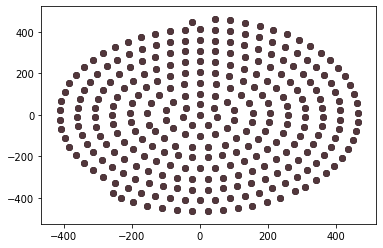

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 -1.000000000000000e+00 1.0e+00 9.24e-01  9e-01  9e-01 1:18.8
    2     20 0.000000000000000e+00 1.2e+00 9.21e-01  9e-01  9e-01 2:37.4


/home/mohamed/.local/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=0.000000, sigma=9.21e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2)
  ')')


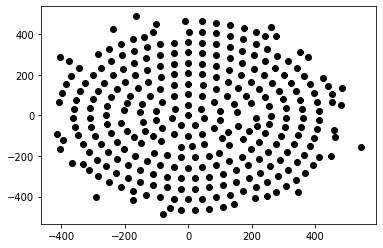

In [7]:
renduFitness("Turing Spot",20,sigma = 1)
#Affichage des concentrations 

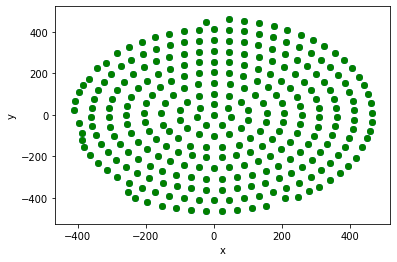

                    0  1
0         19056175104  0
1        306704384000  0
2        308013400064  0
3        307335364608  0
4        308268597248  0
..                ... ..
295    91996991520768  0
296    89149000384512  0
297    86318096842752  0
298    87911764590592  0
299  1474451266863104  0

[300 rows x 2 columns]


In [9]:
SD.setTime(2000)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

Comme on peut le constater pour un sigma grand ça crée un overflow sur les registres ce qui empéche l'algorithme de modifier de façon perceptible les paramètres.

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=1036155, Sun Mar 22 19:40:04 2020)
Amélioration du nombre de turing Spot :  33


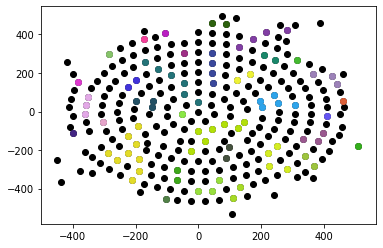

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 -3.300000000000000e+01 1.0e+00 9.49e-04  9e-04  1e-03 1:22.0
Amélioration du nombre de turing Spot :  34


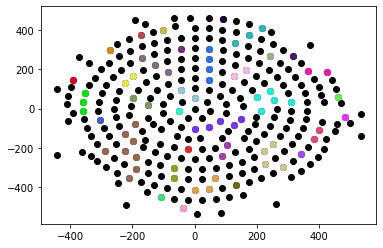

    2     20 -3.400000000000000e+01 1.2e+00 9.51e-04  9e-04  1e-03 2:43.7
    3     30 -3.400000000000000e+01 1.3e+00 9.05e-04  9e-04  9e-04 4:05.4
    4     40 -3.400000000000000e+01 1.3e+00 8.72e-04  8e-04  9e-04 5:26.5
    5     50 -3.400000000000000e+01 1.5e+00 7.86e-04  7e-04  8e-04 6:48.7


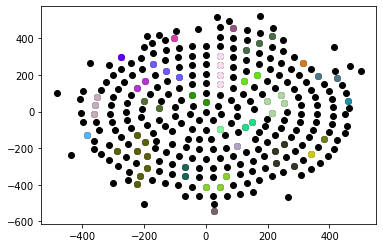

In [10]:
SD.controller.rez_params()
renduFitness("Turing Spot",50,sigma = 0.001)

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=970243, Sun Mar 22 19:48:14 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 -1.877086448831242e+00 1.0e+00 9.91e-04  1e-03  1e-03 1:39.7
    2     20 -1.981324915465331e+00 1.2e+00 1.01e-03  1e-03  1e-03 3:19.2
    3     30 -2.156839551488410e+00 1.3e+00 9.53e-04  9e-04  1e-03 4:58.8
    4     40 -2.020569730084012e+00 1.4e+00 9.63e-04  9e-04  1e-03 6:38.5


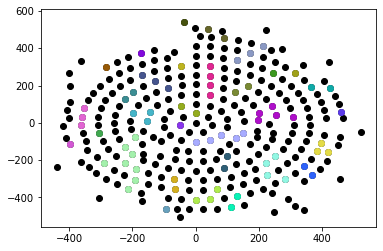

In [11]:
SD.controller.rez_params()
renduFitness("Shape Index",40,sigma = 0.001)

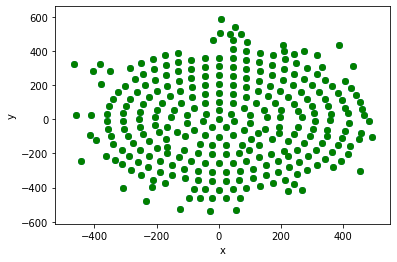

     0  1
0    0  1
1    5  2
2    0  1
3    0  1
4    1  1
..  .. ..
295  4  2
296  1  0
297  0  1
298  0  1
299  2  1

[300 rows x 2 columns]


In [12]:
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

Pour un petit sigma ça fonctionne relativement bien, a noter cependant que certains paramètres sont trés peu impactants comme par exemple les coefficiens de diffusions pour lesquels une variation de 0.001 n'est pas significative (car ils sont de l'ordre de 10²).
Nous profitons de ce rendu pour faire remarquer que maximiser le shape index conduit a la polarization de tous les robots.
##### b)Structure du génotype : 
Dans cette partie nous expérimentons le fait de modifier la structure du génotype, par exemple
nous pouvons considérer un genotype qui n'est pas composé des paramètres de la réaction mais seulement de la diffusion comme suit.

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1043843, Sun Mar 22 19:55:21 2020)
Amélioration du nombre de turing Spot :  35


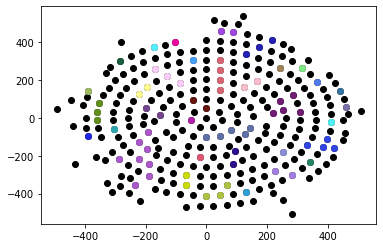

Amélioration du nombre de turing Spot :  40


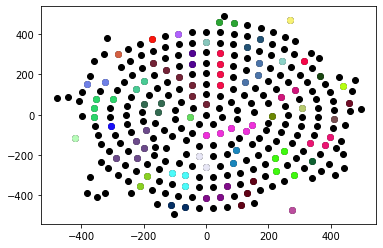

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -4.000000000000000e+01 1.0e+00 1.22e+00  1e+00  2e+00 0:52.0
    2     12 -3.900000000000000e+01 1.5e+00 1.20e+00  9e-01  2e+00 1:41.0
Amélioration du nombre de turing Spot :  43


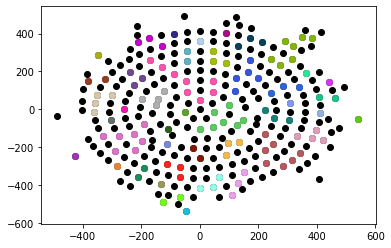

    3     18 -4.300000000000000e+01 1.8e+00 1.05e+00  7e-01  1e+00 2:29.9
Amélioration du nombre de turing Spot :  50


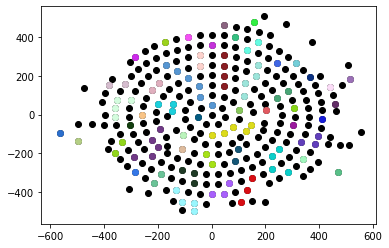

    4     24 -5.000000000000000e+01 1.6e+00 1.23e+00  7e-01  2e+00 3:19.0


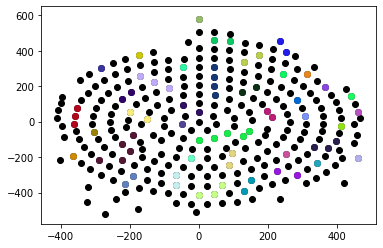

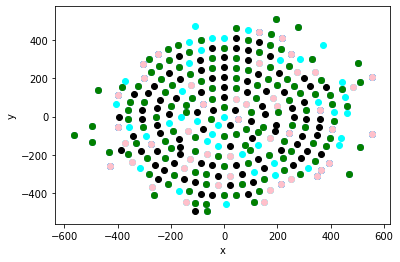

      0  1
0    -3  2
1    18  3
2    -5  2
3    -1  2
4    -7  2
..   .. ..
295  10  4
296  -2  2
297  -4  3
298   0  0
299  -2  2

[300 rows x 2 columns]


In [13]:
SD.controller.rez_params()
renduModel("Turing Spot",20,sigma = 1,Model=("D_u","D_v"))
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=975690, Sun Mar 22 20:15:36 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -2.301377220911355e+01 1.0e+00 8.51e-01  7e-01  8e-01 1:00.1
    2     12 -2.549312981867955e+01 1.2e+00 8.52e-01  7e-01  8e-01 1:59.7
    3     18 -2.447217477862446e+01 1.2e+00 1.12e+00  8e-01  1e+00 2:59.0
    4     24 -3.345633824023322e+01 1.6e+00 1.20e+00  1e+00  1e+00 3:57.8
    5     30 -3.714961887037856e+01 1.3e+00 9.76e-01  8e-01  9e-01 4:56.5


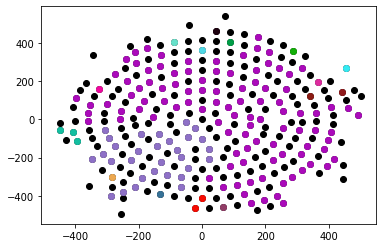

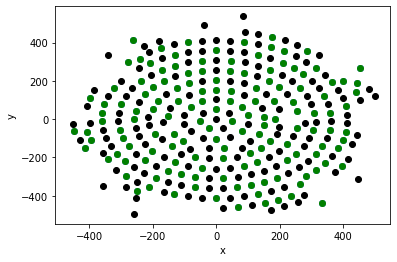

           0  1
0   -1968083  3
1    2798823  5
2   -2651898  4
3    2619496  4
4   -2171671  3
..       ... ..
295  -404374  3
296   -42216  2
297   -25411  2
298      -18  1
299     4349  5

[300 rows x 2 columns]


In [18]:
SD.controller.rez_params()
renduModel("Shape Index",30,sigma = 1,Model=("D_u","D_v"))
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

Donc on voit bien que dans les deux cas ça fonctionne beaucoup mieux de ne pas manipuler simulanément tous les paramètres en plus la réduction de dimension garanti une convergence plus rapide.
De plus comme on n'influe pas sur la réaction il y a beaucoup moins de risques d'overflow sur les registres des robots comme on peut le voire.

##### b)Aggrégation de critères : 
A présent nous allons évaluer l'intéret d'utiliser une aggrégation des deux critères, d'abord l'aggrégation utilisée serra une multiplication afin de pénaliser les structures sans Turing Spot.
Ensuite nous utiliserons une addition ce qui serra semblable a l'utilisation d'un ordre lexicographique (Turing Spot > Shape Index) étant donné que Shape index est généralement inférieur a 2.

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1027645, Sun Mar 22 20:21:30 2020)


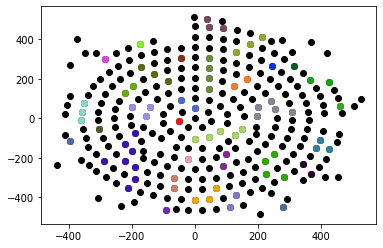

Nouvelle meilleur fitness a :  -60.77878607845061
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -6.077878607845061e+01 1.0e+00 8.66e-02  8e-02  8e-02 1:02.5


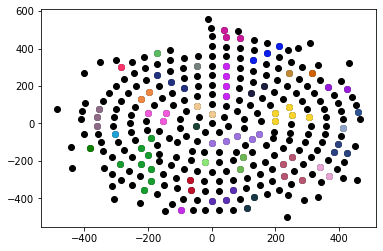

Nouvelle meilleur fitness a :  -63.111145023448415
    2     12 -6.311114502344842e+01 1.1e+00 7.74e-02  6e-02  7e-02 2:03.6
    3     18 -6.091308571793775e+01 1.1e+00 7.11e-02  5e-02  6e-02 3:03.4


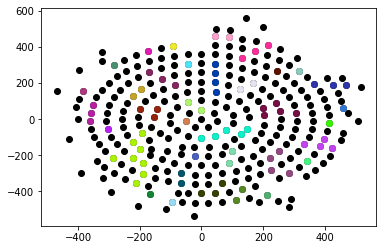

Nouvelle meilleur fitness a :  -66.59929141283342
    4     24 -6.659929141283342e+01 1.2e+00 6.66e-02  4e-02  5e-02 4:04.1
    5     30 -6.149739542835869e+01 1.2e+00 5.48e-02  3e-02  4e-02 5:04.1
    6     36 -6.320373502466728e+01 1.1e+00 6.30e-02  4e-02  5e-02 6:04.8
    7     42 -6.659929141283342e+01 1.4e+00 4.75e-02  2e-02  3e-02 7:04.4


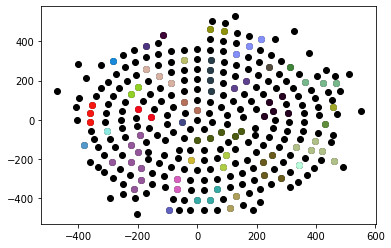

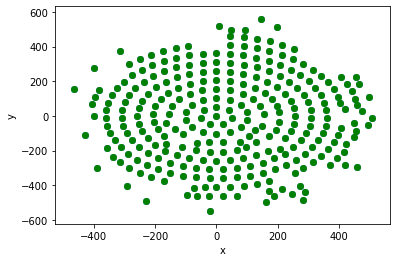

     0  1
0    0  1
1    5  2
2    0  1
3    0  1
4    1  2
..  .. ..
295  4  2
296  0  1
297  0  1
298  0  1
299  2  2

[300 rows x 2 columns]


In [19]:
SD.controller.rez_params()
renduModel("Aggregation Multiplication",40,sigma = 1,Model=("D_u","D_v"))
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=991120, Sun Mar 22 20:29:43 2020)


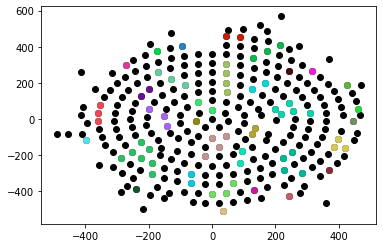

Nouvelle meilleur fitness a :  -34.64663751579826


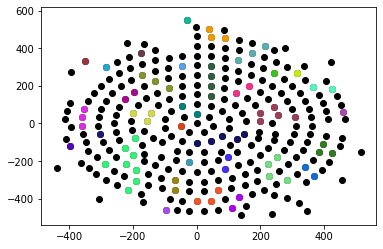

Nouvelle meilleur fitness a :  -34.718776571867394
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -3.471877657186739e+01 1.0e+00 8.54e-02  7e-02  8e-02 0:57.0


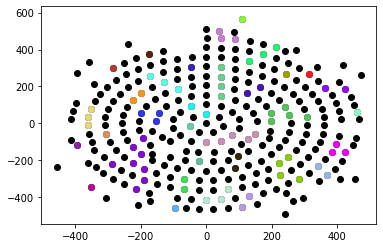

Nouvelle meilleur fitness a :  -34.86366017648485
    2     12 -3.486366017648485e+01 1.3e+00 7.97e-02  6e-02  7e-02 1:54.7


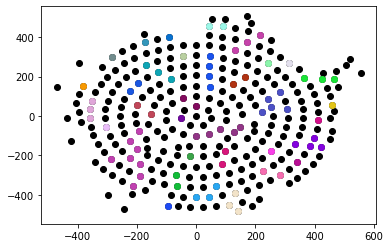

Nouvelle meilleur fitness a :  -35.5706099214915
    3     18 -3.557060992149150e+01 1.4e+00 8.69e-02  7e-02  7e-02 2:52.0


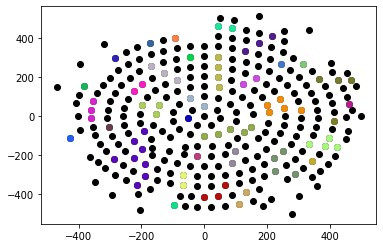

Nouvelle meilleur fitness a :  -35.58974433866709


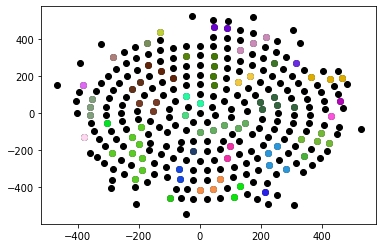

Nouvelle meilleur fitness a :  -36.55172690229858
    4     24 -3.655172690229858e+01 1.2e+00 8.54e-02  6e-02  7e-02 3:50.4


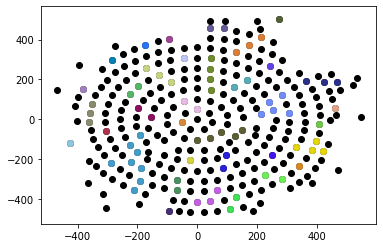

Nouvelle meilleur fitness a :  -36.57044230436247
    5     30 -3.657044230436247e+01 1.2e+00 9.45e-02  6e-02  9e-02 4:47.7


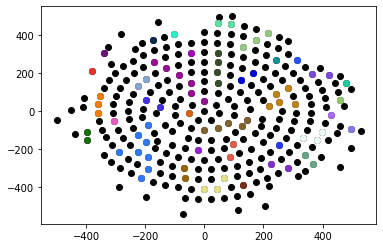

Nouvelle meilleur fitness a :  -36.74845129050552
    6     36 -3.674845129050552e+01 1.4e+00 1.53e-01  1e-01  2e-01 5:43.8


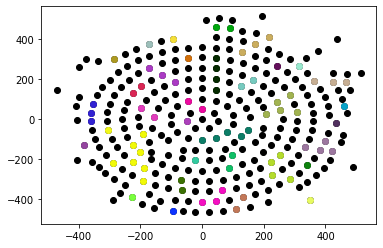

Nouvelle meilleur fitness a :  -36.77003052473199
    7     42 -3.677003052473199e+01 1.6e+00 1.26e-01  8e-02  1e-01 6:40.1


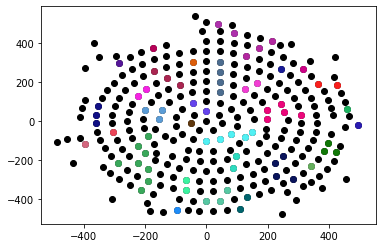

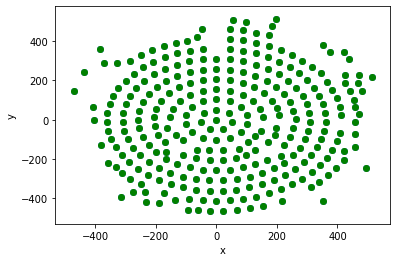

     0  1
0    0  1
1    5  2
2    0  1
3    0  1
4    1  2
..  .. ..
295  6  3
296  3  2
297  0  1
298  1  2
299  0  0

[300 rows x 2 columns]


In [4]:
SD.controller.rez_params()
renduModel("Aggregation Addition",40,sigma = 1,Model=("D_u","D_v"))
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

Le deux résolutions atteignent relativement bien leur objectif et reste assez équivalentes.
Dans les deux nous constatons un résultat sensiblement plus intéressant que celui proposé par le paramètrage par défaut ce qui constitue déja une progression tangible.

## Partie 02 : Prédiction d'une topologie en utilisant des réseaux de neurones
### Auteurs : Louis et Mohamed
Les deux problématiques principales auxquelles nous avons pu nous confronter dans cette partie sont liée a : 
* La gestion du temps de calculs dans le cas de réseau de neurones trés grand
* Le cout a optimiser
* La structure de réseau de neurones a adopter

#### 1/Gestion du temps de calcul:
Etant donné que l'optimisation des réseaux de neurones se fait sur simulateur, la première contribution ici consiste a créer une version alternative du code s'exeuctant sur les kilobots qui puisse s'éxécuter sur processeur graphique ce qui accélére considérable la vitesse de simulation pour des réseaux de neurones profonds.
De plus l'ensemble des opérations du CMA-ES sont effectués sur GPU grâce a Tensorflow.
La variation de temps d'éxécution en fonction du nombre de poids a optimiser est donnée par la courbe suivante : 
![40% center](GPUCPU.png)

#### 2/Architecture :
Afin d'évaluer une architecture correcte pour commencer a essayer d'apprendre a prédire les formes nous allons d'abord nous intéresser a l'effet de la dite architecture sur les prédictions émises.
Il y'a donc deux sorties chacune sigmoide qui représenterons respéctivement la probabilité que la forme soit une ligne et un cercle.
Nous fixons arbitrairement le nombre de canaux de communications a 3.

(11_w,22)-aCMA-ES (mu_w=6.5,w_1=26%) in dimension 441 (seed=1045942, Mon Mar 23 09:30:09 2020)
Iteration  1  : 
Nouvelle meilleure Précision :  0.5
Iteration  2  : 
Iteration  3  : 
Iteration  4  : 
Iteration  5  : 
Iteration  6  : 
Iteration  7  : 
Iteration  8  : 
Iteration  9  : 
Iteration  10  : 
Iteration  11  : 
Iteration  12  : 
Iteration  13  : 
Iteration  14  : 
Iteration  15  : 
Iteration  16  : 
Iteration  17  : 
Iteration  18  : 
Iteration  19  : 
Iteration  20  : 
Iteration  21  : 
Iteration  22  : 
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     22 -5.000000000000000e-01 1.0e+00 9.85e-03  1e-02  1e-02 0:10.8


/home/mohamed/.local/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.500000, sigma=9.85e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1)
  ')')


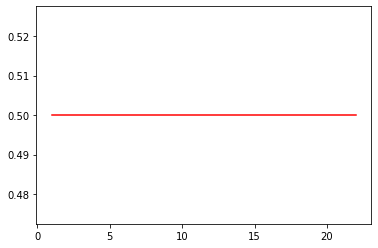

In [2]:
shape = dict(
        NEURONES = 15,
        HIDDEN = 2
    )
optimizeNeuralNetwork(10,0.01,fitnessPrecision,shape)

Comme on peut le voire les résultats sont pitoyables, la raison de cela est facile a constater en observant les prédictions.

In [13]:
SK = swarmDescriptor("kilotron_cuda")
SK.readDatas()
print(SK.predictions)

[[0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]
 [0.60857707 0.63800108]]


Comme on peut le voire les prédictions ne varient pas en fonction des points de l'essaim en dépit de la variation des U et des V, pour éclaircir cette situation nous avons étudié l'effet du nombre de neurones par couche caché sur un architecture avec deux couches cachées.
Donc nous allons afficher les courbes correspondant a l'évolution de la variance moyennes des prédictions et du temps moyen d'éxécution en fonction du nombre de neurones.

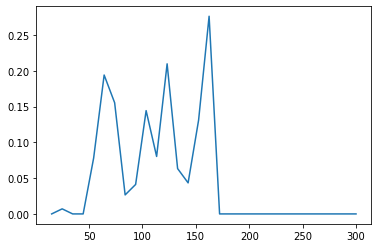

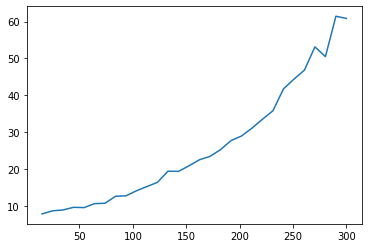

In [4]:
#Ne pas réexecuter ça prend excessivement longtemps a compute sauf en changeant le max et le nombre de points
plot_variance_neuronnes(min=15,max=300,hidden = 2,points = 30)

Comme on peut le voire la variance des prédictions entre les différentes robots est trés affecté par le nombre de neuronnes et elle s'annule pour plus de 170 neurones environ et est également trés faible pour des petits nombres de neurones.
Nous prendrons 140 neurones pour avoir un bon compromis entre temps et variance des prédictions.
A noter aussi le temps d'éxécution qui peut atteindre jusqu'a 60 secondes ce qui rendrait le calcul beaucoup trop long pour être envisageable.

In [ ]:
shape = dict(
        NEURONES = 120,
        HIDDEN = 2
    )
optimizeNeuralNetwork(10,0.1,fitnessPrecision,shape)

(16_w,33)-aCMA-ES (mu_w=9.4,w_1=19%) in dimension 16086 (seed=1032362, Mon Mar 23 11:35:19 2020)
Iteration  1  : 
Nouvelle meilleure Précision :  0.5
Iteration  2  : 
Iteration  3  : 
Iteration  4  : 
Iteration  5  : 
Iteration  6  : 
Iteration  7  : 
Iteration  8  : 
Iteration  9  : 
Iteration  10  : 
Iteration  11  : 
Iteration  12  : 
Iteration  13  : 
Iteration  14  : 
Iteration  15  : 
Iteration  16  : 
Iteration  17  : 
